# Scrapping Website Marketplace

# Proses Pembuatan Scrapping dengan Target Tokopedia

## Scraping dengan Beautiful Soup 4
### 1.Mempersiapkan Tools

Sebelum Melakukan Scrapping dan ,
Library yang dibutuhkan yaitu:
* Selenium
* Beautiful Soup 4

Library Tersebut Dapat di install dengan python3 yaitu:
* ```pip3 install selenium```
* ```pip3 install beautifulsoup4```

Mempersiapkan Aplikasi Browser dan Driver Browser:
* Aplikasi Browser sudah tersintall
* Driver Browser sudah terinstall
* Aplikasi dan Driver harus memiliki Versi yang sama

Proses Installasi

* Dengan Firefox
    1. Jika Belum memiliki Browser Firefox, dapat di [Download](https://download.mozilla.org/?product=firefox-stub&os=win&lang=en-US&attribution_code=c291cmNlPXd3dy5nb29nbGUuY29tJm1lZGl1bT1yZWZlcnJhbCZjYW1wYWlnbj0obm90IHNldCkmY29udGVudD0obm90IHNldCkmZXhwZXJpbWVudD0obm90IHNldCkmdmFyaWF0aW9uPShub3Qgc2V0KSZ1YT1jaHJvbWU.&attribution_sig=774d9972789664be6672b065e7f33820ea1cb1e7bafb5ea8c6b2a4f4bc207c70) 
    2. Jika sudah, anda dapat memeriksa browser anda, dibawah ini adalah caranya:
        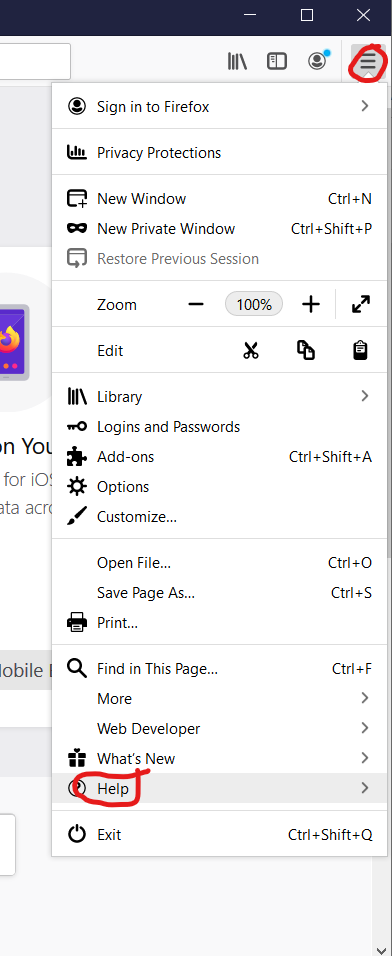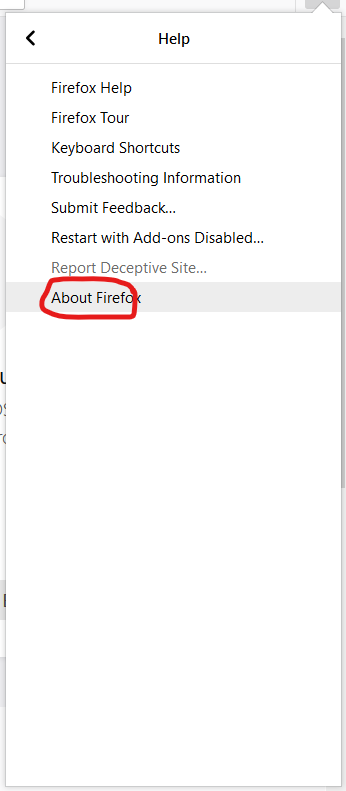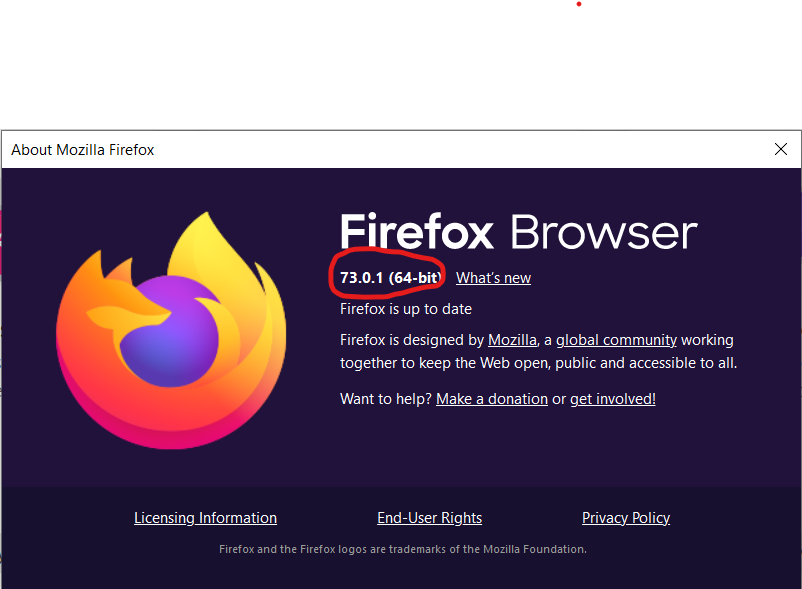
    3. Intal driver browsing sesuai dengan versi aplikasi browsing [Download](https://github.com/mozilla/geckodriver/releases)
    
* Dengan Chrome
    1. Jika Belum memiliki Browser Chrome, dapat di [Download](https://dl.google.com/tag/s/appguid%3D%7B8A69D345-D564-463C-AFF1-A69D9E530F96%7D%26iid%3D%7BD6B35C78-230B-9B28-CF32-7395FA19234C%7D%26lang%3Den%26browser%3D4%26usagestats%3D1%26appname%3DGoogle%2520Chrome%26needsadmin%3Dprefers%26ap%3Dx64-stable-statsdef_1%26installdataindex%3Dempty/update2/installers/experimental/0/ChromeSetup.exe?src=1&filename=ChromeSetup.exe)
    2. Jika sudah, anda dapat memeriksa browser anda, dibawah ini adalah caranya:
       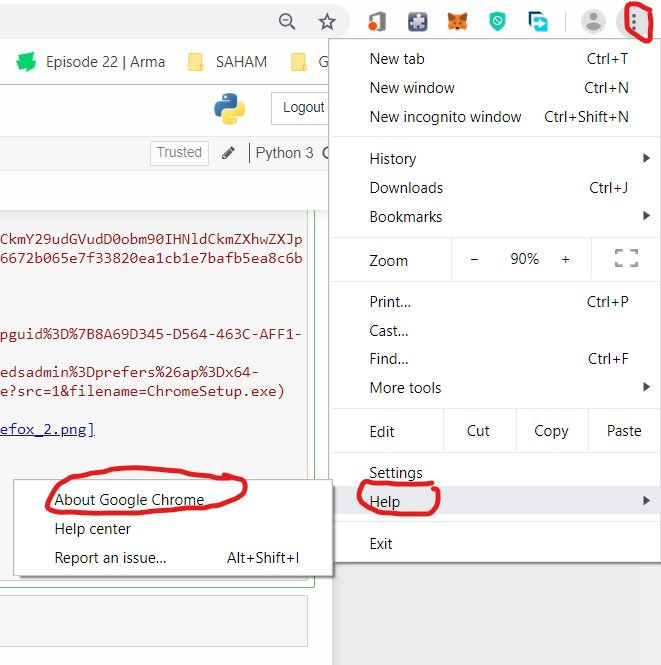 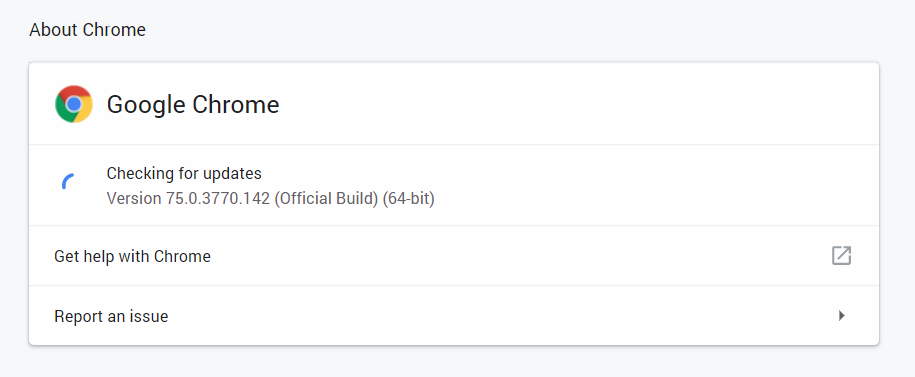
    3. Intal driver browsing sesuai dengan versi aplikasi browsing [Download](https://chromedriver.chromium.org/downloads)


Pada kali ini akan Scraping Website Tokopedia:

### 2.Import Library dan Generate Scrapping
* Mengimport Library <ins>Beautiful Soup 4</ins> dan <ins>Requests</ins>

In [ ]:
from bs4 import BeautifulSoup
import requests

* Dibawah ini adalah template link request untuk melakukan pencaring, <br>
Kemudian program akan meminta input user untuk barang yang akan dicari

In [ ]:
linkURL="https://www.tokopedia.com/search?st=product&q="

linkTool=input("Mencari Barang: ")
linkTool=linkTool.replace(" ", "+")

* Dibawah ini program akan melakukan request jika input sudah didapatkan.

In [ ]:
page = requests.get(linkURL+linkTool,timeout=2)

* Diatas ini error, karena requests langsung terhadap link tokopedia, maka akan error seperti ini karenakan tidak menggunakan user agent, yang seolah-olah mengakses web tersebut menggunakan user agent tersebut.
* Maka dari itu, Dibawah ini adalah code untuk user agent

In [ ]:
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.50 Safari/537.36'
}
page = requests.get(linkURL+linkTool,headers=headers)

In [ ]:
scrapping=BeautifulSoup(page.content,'lxml')
print(scrapping)

* jika menggunakan code di atas ini,<br>requests get terhadap target URL, hasil scrpaping data website akan di dapatkan,<br>
__Tetapi__ javascript tidak akan jalan, karena dengan requests tidak menjalankan javascript.

***
* Mulai dari sini, program akan memulai scraping
* maka dari itu, harus di import library __selenium__ yang berfungsi untuk menjalankan engine driver browser.<br>
hal ini bermanfaat terhadap website scrapping untuk menjalankan javascript

In [ ]:
from selenium import webdriver

* setelah import library, pastikan browser driver dan aplikasi browser sudah terinstall di perangkat. <br>
patikan juga browser driver dan aplikasi browser harus memiliki versi yang sama.
* dalam scrapping kali ini, saya akan menggunakan chrome sebagai tools yang saya gunakan  untuk scrapping
* Jangan lupa untuk menyertakan user agent, dengan membuat variable user agent terlebih dahulu pada kode di bawah ini. 

In [ ]:
user_agent = 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.50 Safari/537.36'

* Pada option web driver, akan di konfigurasi seperti ini:

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument('--incognito')
options.add_argument('user-agent={0}'.format(user_agent))
options.add_argument('--headless')

> Penjelasan option:
> * --incognito = tidak menyimpan jejak pencarian yang dilakukan.
> * --headless = supaya UI tidak di munculkan yang bermanfaat supaya proses scrapping lebih cepat.
> * --user agent = berguna untuk dapat bernegosiasi dengan server website

* Kemudian masukkan option tersebut ke dalam konfigurasi chrome driver di bawah ini.

In [ ]:
driver = webdriver.Chrome(options=options)

* lakukan scrapping dengan generate isi page_source, kemudian generate source code dengan BeautifulSoup seperti code di bawah ini.

In [ ]:
driver.get(linkURL+linkTool)

In [ ]:
content = driver.page_source
scrapping = BeautifulSoup(content,'lxml')
print(scrapping)

* Untuk hasil scrapping, akan memunculkan banyak data.<br>
untuk membatasinya, harus dibutuhkan input integer<br>
supaya banyak data yang di keluarkan sesuai dengan yang dimaksud.

In [ ]:
batas=int(input("Batas Kemunculan Barang: "))

### 3.Proses Data


* Pada Website Topedia, hasil pencarian barang akan langsung di tujukan dengan barang rekomendasi,<br>
selebihnya memunculkan barang dengan filter "paling sesuai"
* di bawah ini adalah function untuk memproses data
* Varibel 'Semua' untuk menampung data penjualan yang laku

In [ ]:
Atas = scrapping.findAll('div', attrs={'class':'ta-product-wrapper'})
Semua = scrapping.findAll('div', attrs={'class':'_2OBup6Zd'})
count_data = 0 #initial count dari 0

In [ ]:
count_data = 0 #initial count dari 0
# ALL
for data in Semua:
    if count_data==batas:
        break
    count_data+=1
    link=data.find('a')['href']
    print("Link\t: ",link)
    judul=data.find('h3',attrs={'Ka_fasQS'})
    print("Judul\t: ",judul.text)
    harga=data.find('span',attrs={'_3fNeVBgQ'})
    print("Harga\t: ",harga.text)
    rating=data.find('span',attrs={'_3-hbLA9j'})
    print("Rating\t: ","(0)" if rating == None else rating.text)
    print()

* untuk scraping rating detail agar mengetahui detail rating per produk, maka page akan pindah ke halaman produk dan melakukan scraping terhadap detail rating.
* Berikut kode untuk scraping detail ketika sudah masuk ke halaman produk:

In [ ]:
for i in range(5):
    script = 'document.querySelector("#zeus-root > div > div.css-1jdotmr > div:nth-child(5) > div.css-drikti.e1ufc1ph1 > div.css-nvt3av.e1ufc1ph0 > div > div:nth-child({}) > div.css-udfbf8.e1ufc1ph0 > p")'.format(i+1)
    hasil= driver.execute_script('return '+script) 
    print(hasil)

* untuk mendapatkan rating, data tersebut harus di generate dengan javascript, jika langsung dengan beautifulsoup, tidak akan bisa.
* untuk code program javascript tersebut yaitu:
```document.querySelector("#zeus-root > div > div.css-1jdotmr > div:nth-child(5) > div.css-drikti.e1ufc1ph1 > div.css-nvt3av.e1ufc1ph0 > div > div:nth-child(1) > div.css-udfbf8.e1ufc1ph0 > p")```
* hasil execute javascript di atas akan menghasilkan jumlah rating yang memiliki bintang 5
* untuk memperoleh data bintang 4 - 1, pada kode ```div:nth-child(1)``` harus di lakukan looping dengan:
<code>
for i in range(5):
    script = '...div:nth-child(i+1)...'
</code>

* Kesimpulan dari code scrapping di atas, maka dapat disimpulkan dalam function sebagai berikut:

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
from numpy import array
import time

linkTool=input("Mencari Barang: ")
linkTool=linkTool.replace(" ", "+")
batas=int(input("Batas Kemunculan Barang: "))
user_agent = 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.50 Safari/537.36'

options = webdriver.ChromeOptions()
options.add_argument('--incognito')
options.add_argument('--no-sandbox')
options.add_argument('user-agent={0}'.format(user_agent))
options.add_argument('--headless')
driver = webdriver.Chrome(options=options)
driver.implicitly_wait(15)
try:
    data = scrappingTokopedia(linkTool,driver,batas)
    driver.quit()
except (Exception,NoSuchElementException) as e:
    print(e)
    driver.quit()

Mencari Barang: lampu led
Batas Kemunculan Barang: 4


In [17]:
data[0][3]

['39', '2', '1', '0', '0']

* Fungsi **scrapingTokopedia()** pada code di bawah ini adalah fungsi yang ditujukan untuk scraping Tokopedia.

In [13]:
def scrappingTokopedia(linkTool,driver,batas):
    linkURLTokopedia="https://www.tokopedia.com/search?st=product&q="
    
    driver.get(linkURLTokopedia+linkTool)
    driver.execute_script('window.scrollBy(0, 200)');
    dataNonRating=list(getAllNonRating(driver,batas))
        
    dataLink=array(dataNonRating)
    
    for num,link in enumerate(list(dataLink[:,0])) :
        driver.get(link)
        # Untuk trigger supaya page dapat loading
        driver.execute_script('window.scrollBy(0, 200)');
        waitingPage()
#         print(dataNonRating[num])
        dataNonRating[num].append(list(getRating()))
    return dataNonRating

* Fungsi **waitingPage()** pada code di bawah ini untuk melakukan pengecekan "page loading" sampai complete, maka data dapat di scraping

In [14]:
def waitingPage():
    script = 'document.querySelector("#zeus-root > div > div.css-1jdotmr > div:nth-child(5) > div.css-drikti.e1ufc1ph1 > div.css-nvt3av.e1ufc1ph0 > div > div:nth-child(1) > div.css-udfbf8.e1ufc1ph0 > p")'
    while(driver.execute_script('return '+script) == None ):
        time.sleep(.3)

* Fungsi **getAllNonRating()** pada code di bawah ini untuk melakukan scraping terhadap produk kecuali data rating

In [18]:
def getAllNonRating(driver,batas):
    content = driver.page_source
    scrapping=BeautifulSoup(content,'lxml')
    Semua = scrapping.findAll('div', attrs={'class':'css-1g20a2m'})
    count_data = 0
    time.sleep(.8)
    arraylink=[]
    for data in Semua:
        if count_data==batas:
            break
        count_data+=1
        link = data.find('a')['href']
        judul = data.find('span',attrs={'css-1bjwylw'})
        harga = data.find('span',attrs={'css-o5uqvq'})
        yield [link,judul.text,harga.text]


* Fungsi **getRating()** pada code di bawah ini untuk melakukan scraping data rating per produk

In [5]:
def getRating():
    for i in range(5):
        script = 'document.querySelector("#zeus-root > div > div.css-1jdotmr > div:nth-child(5) > div.css-drikti.e1ufc1ph1 > div.css-nvt3av.e1ufc1ph0 > div > div:nth-child({}) > div.css-udfbf8.e1ufc1ph0 > p")'.format(i+1)
        hasil= driver.execute_script('return '+script) 
        yield hasil.text

# Scrapping Lazada

In [ ]:
linkURLLazada="https://www.lazada.co.id/catalog/?q="
driver.get(linkURLLazada+linkTool)
content = driver.page_source
scrapping = BeautifulSoup(content,'lxml')
Semua = scrapping.findAll('div', attrs={'class':'c2prKC'})
count_data = 0 #initial count dari 0
# ALL
for data in Semua:
    if count_data==batas:
        break
    count_data+=1
    link=data.find('a')['href']
    print("Link\t: https://",link[2:])
    judul=data.find('div',attrs={'c16H9d'})
    print("Judul\t: ",judul.text)
    harga=data.find('span',attrs={'c13VH6'})
    print("Harga\t: ",harga.text)
    rating=data.find('span',attrs={'c3XbGJ'})
    print("Rating\t: ","(0)" if rating == None else rating.text)
    print()

# Scrapping Bukalapak

In [ ]:
linkURLBukalapak="https://www.bukalapak.com/products?utf8=%E2%9C%93&from_keyword_history=false&search%5Bkeywords%5D="
driver.get(linkURLBukalapak+linkTool)
content = driver.page_source
scrapping = BeautifulSoup(content,'lxml')
Semua = scrapping.findAll('article', attrs={'class':'product-display'})
count_data = 0 #initial count dari 0
# ALL
for data in Semua:
    if count_data==batas:
        break
    count_data+=1
    link=data.find('a')['href']
    print("Link\t: ",link)
    judul=data.find('a',attrs={'product__name'})
    print("Judul\t: ",judul.text)
    harga=data.find('span',attrs={'amount'})
    print("Harga\t: ","Rp ",harga.text)
    rating=data.find('a',attrs={'review__aggregate'})
    print("Rating\t: ","(0)" if rating == None else rating.text)
    print()


In [ ]:
driver.quit()

* NOTE: setiap 1 bulan, name class selalu ganti